In [2]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
df = pd.read_csv("./data/cleaned_data.csv")
df.head()

,Date,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,...,pol,precipitation,pressure,psi,so2,temperature,uvi,wd,wind-gust,wind-speed
0,2014-12-29,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,9.00,...,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,4.60,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,23.40,...,NaN,NaN,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,BR,São Paulo,NaN,5.50,NaN,NaN,NaN,NaN,17.90,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split 'Date' column into 'year', 'month' and 'day'
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove 'Date' column
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)

In [6]:
# Display the first 5 rows of the dataframe
df.head()

,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,o3,...,psi,so2,temperature,uvi,wd,wind-gust,wind-speed,year,month,day
0,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,9.00,NaN,...,NaN,2.60,NaN,NaN,NaN,NaN,NaN,2014,12,29
1,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,4.60,3.70,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2014,12,29
2,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,23.40,2.90,...,NaN,1.60,NaN,NaN,NaN,NaN,NaN,2014,12,29
3,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,3.00,4.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12,29
4,BR,São Paulo,NaN,5.50,NaN,NaN,NaN,NaN,17.90,19.50,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2014,12,29


In [7]:
# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  

# Spalten auswählen, die weniger als 50% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)


Anzahl der entfernten Spalten: 9
Übrige Spalten: Index(['Country', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed', 'year',
       'month', 'day'],
      dtype='object')


In [8]:
df_cleaned.head()

,Country,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed,year,month,day
0,AT,Vienna,0.10,NaN,NaN,9.00,NaN,20.00,65.00,NaN,2.60,NaN,NaN,NaN,2014,12,29
1,AU,Brisbane,1.90,NaN,NaN,4.60,3.70,11.00,20.00,NaN,1.10,NaN,NaN,NaN,2014,12,29
2,BE,Brussels,0.10,NaN,NaN,23.40,2.90,25.00,71.00,NaN,1.60,NaN,NaN,NaN,2014,12,29
3,BO,Cochabamba,NaN,NaN,NaN,3.00,4.30,25.00,NaN,NaN,NaN,NaN,NaN,NaN,2014,12,29
4,BR,São Paulo,5.50,NaN,NaN,17.90,19.50,20.00,50.00,NaN,1.10,NaN,NaN,NaN,2014,12,29


In [ ]:
# # Clusteranalyse zur Schadstoffbelastung

# from sklearn.preprocessing import StandardScaler

# # Liste der Schadstoff-Features für das Clustering
# pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# # Durchschnittliche Schadstoffwerte pro Stadt berechnen
# df_cluster = df.groupby("City")[pollutants].mean().dropna()

# # Daten skalieren (K-Means ist empfindlich gegenüber unterschiedlichen Skalen)
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_cluster)

# # Ergebnis als DataFrame zurückgeben
# df_cluster_scaled = pd.DataFrame(df_scaled, index=df_cluster.index, columns=pollutants)

# # Überprüfen, ob die Daten korrekt vorbereitet sind
# df_cluster_scaled.head()

,co,no2,o3,so2,pm10,pm25
City,,,,,,
Abu Dhabi,-1.00,0.15,1.38,0.36,2.29,1.36
Amsterdam,-0.39,-0.14,0.30,-0.93,-0.71,-0.75
Ankara,0.98,1.40,-0.58,0.09,0.32,-0.00
Athens,-1.00,0.08,1.60,-0.01,-0.33,-0.29
Belgrade,0.03,0.04,-0.08,0.64,-0.29,0.08


In [19]:
# Daten für 2014 & 2025 entfernen, weil zu wenige Datenpunkte
df_filtered = df[(df["year"] > 2014) & (df["year"] < 2025)]

# Durchschnittliche Schadstoffwerte pro Stadt berechnen (ohne 2014 & 2025)
df_cluster = df_filtered.groupby("City")[pollutants].mean().dropna()

# Daten skalieren
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Ergebnis als DataFrame speichern
df_cluster_scaled = pd.DataFrame(df_scaled, index=df_cluster.index, columns=pollutants)

# K-Means erneut ausführen mit 4 Clustern
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster_scaled["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Neue Cluster-Zuordnung der Städte anzeigen
df_clusters_no_outliers = df_cluster_scaled[["Cluster"]].sort_values(by="Cluster")
df_clusters_no_outliers


,Cluster
City,
Tehran,0
Taipei,1
Moscow,1
Łódź,1
Marseille,1
Manila,1
Reykjavík,1
London,1
Rijeka,1


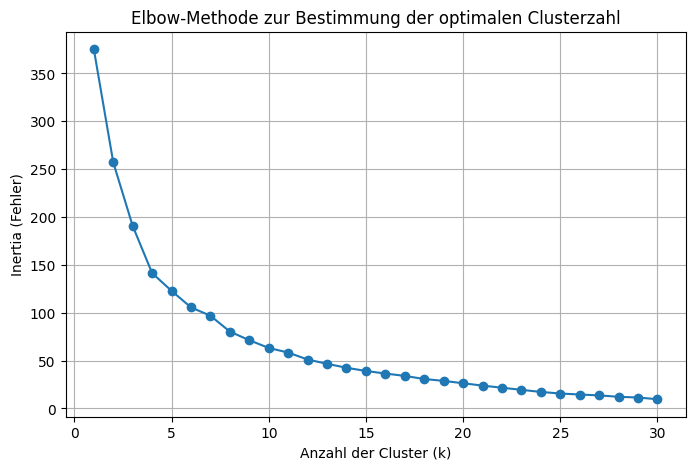

In [20]:
# Teste verschiedene Clusterzahlen (k = 1 bis 10)
inertia = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)  # Speichert den Fehler (Inertia)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Fehler)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusterzahl")
plt.grid(True);

Entscheidung: 5 Cluster sind gut - aber Teheran it so dreckig, dass es allein sein eigens Cluster bildet. Also nehmen wir es erst mal raus, damit es die anderen Cluster nicht verzerrt. Dadurch nehmen wir für die Clusteranalyse aber nur noch 4 Cluster.

In [21]:
# Teheran aus dem DataFrame entfernen
df_cluster_no_tehran = df_cluster_scaled.drop(index="Tehran")

# K-Means erneut ausführen mit 4 Clustern (oder einer anderen optimalen Zahl)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster_no_tehran["Cluster"] = kmeans.fit_predict(df_cluster_no_tehran)

# Neue Cluster-Zugehörigkeit der Städte anzeigen
df_clusters_no_tehran = df_cluster_no_tehran[["Cluster"]]
df_clusters_no_tehran_sorted = df_clusters_no_tehran.sort_values(by="Cluster")  # Sortiert nach Cluster
df_clusters_no_tehran_sorted

,Cluster
City,
Reykjavík,0
Vancouver,0
Brisbane,0
Saint-Denis,0
Morelia,1
Irbid,1
Lima,1
Pristina,1
Quito,1
